In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# include api key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# city and lan long list
cities = []
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
# perform api calls
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
api_key = api_keys.api_key
api_key

'cdeb6ccf3f1c75facf9ef6bfc3e69dab'

In [4]:
# function to loop the cities
def callOpenWeather(city):
    url = base_url + city + '&appid=' + api_key
    return_data = {}
    
    data = requests.get(url).json()
    
    if(data['cod'] == 200):
        return_data = {
            'cod': data['cod'],
            'city': data['name'],
            'cloudiness': data['clouds']['all'],
            'country': data['sys']['country'],
            'date': data['dt'],
            'humidity': data['main']['humidity'],
            'lat': data['coord']['lat'],
            'lon': data['coord']['lon'],
            'max_temp': data['main']['temp_max'],
            'wind_speed': data['wind']['speed']
        }
     
    else:
        return_data = {
            'cod': data['cod']
        }
        
    return return_data
   

In [5]:
city_record = {
    'city': [],
    'cloudiness': [],
    'country': [],
    'date': [],
    'humidity': [],
    'lat': [],
    'lon': [],
    'max_temp': [],
    'wind_speed': []
}
print('Beginning Data Retrieval\n-----------------------------')
# processing all cities
for inx, city in enumerate(cities):
    url = base_url + city + '&appid=' + api_key
    data = requests.get(url).json()
    
    if data['cod'] == 200:
        city_record['city'].append(data['name'])
        city_record['cloudiness'].append(data['clouds']['all'])
        city_record['country'].append(data['sys']['country'])
        city_record['date'].append(data['dt'])
        city_record['humidity'].append(data['main']['humidity'])
        city_record['lat'].append(data['coord']['lat'])
        city_record['lon'].append(data['coord']['lon'])
        city_record['max_temp'].append(data['main']['temp_max'])
        city_record['wind_speed'].append(data['wind']['speed'])
        
        print(f'Processing Record {len(city_record["city"])} | {data["name"]}')
        
    else:
        print('City not found. Skipping...')

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Mataura
City not found. Skipping...
Processing Record 2 | Talnakh
Processing Record 3 | Baruun-Urt
Processing Record 4 | Hamilton
Processing Record 5 | Saskylakh
Processing Record 6 | Bubaque
Processing Record 7 | New Norfolk
Processing Record 8 | Vangaindrano
Processing Record 9 | Ribeira Grande
Processing Record 10 | Upernavik
Processing Record 11 | Vestmanna
Processing Record 12 | Flin Flon
Processing Record 13 | Magadan
Processing Record 14 | Ponta do Sol
Processing Record 15 | Loding
Processing Record 16 | Kaitangata
Processing Record 17 | Atyrau
Processing Record 18 | Nikolskoye
Processing Record 19 | Katobu
Processing Record 20 | Rikitea
Processing Record 21 | Punta Arenas
Processing Record 22 | Hermanus
Processing Record 23 | Chuy
Processing Record 24 | Busselton
Processing Record 25 | Bogdanovich
Processing Record 26 | Kodiak
Processing Record 27 | Hobart
Processing Record 28 | Arraial do Cabo
Process

Processing Record 228 | Isangel
Processing Record 229 | Tomball
Processing Record 230 | Flinders
Processing Record 231 | Mount Gambier
Processing Record 232 | Chekhov
Processing Record 233 | Port Blair
Processing Record 234 | Namatanai
Processing Record 235 | Mongo
Processing Record 236 | Aviles
Processing Record 237 | Crepy-en-Valois
Processing Record 238 | Fort Nelson
Processing Record 239 | Katherine
Processing Record 240 | Kahului
Processing Record 241 | Vila Franca do Campo
Processing Record 242 | Mehamn
Processing Record 243 | Moanda
Processing Record 244 | Omboue
Processing Record 245 | Calvinia
Processing Record 246 | Xiongzhou
Processing Record 247 | Yulara
Processing Record 248 | Lincoln
City not found. Skipping...
Processing Record 249 | Kedainiai
Processing Record 250 | Pangody
Processing Record 251 | Kavieng
Processing Record 252 | Nanortalik
Processing Record 253 | Hilo
Processing Record 254 | Samarai
Processing Record 255 | Reitz
Processing Record 256 | Kaltasy
Processin

Processing Record 454 | Baiyin
Processing Record 455 | Chernyakhovsk
Processing Record 456 | Tirumullaivasal
Processing Record 457 | Homer
Processing Record 458 | Asansol
Processing Record 459 | Mtwango
Processing Record 460 | Adrar
Processing Record 461 | Nieuw Nickerie
Processing Record 462 | Batemans Bay
Processing Record 463 | Nefteyugansk
City not found. Skipping...
Processing Record 464 | Ucluelet
Processing Record 465 | Takhtamygda
City not found. Skipping...
City not found. Skipping...
Processing Record 466 | Caravelas
Processing Record 467 | Gamba
Processing Record 468 | Yuzhou
Processing Record 469 | Natal
Processing Record 470 | Piney Green
Processing Record 471 | Faya
Processing Record 472 | General Teran
Processing Record 473 | Manicore
Processing Record 474 | Ulaangom
Processing Record 475 | Sinjar
Processing Record 476 | Ceres
Processing Record 477 | Pitimbu
Processing Record 478 | Yinchuan
Processing Record 479 | Remontnoye
Processing Record 480 | Orcopampa
Processing R

In [6]:
# Display the DataFrame
city_record_df = pd.DataFrame(city_record)
city_record_df.head()

,city,cloudiness,country,date,humidity,lat,lon,max_temp,wind_speed
0,Mataura,0,NZ,1543194976,60,-46.19,168.86,291.432,9.86
1,Talnakh,0,RU,1543194976,56,69.49,88.39,249.007,1.21
2,Baruun-Urt,0,MN,1543194976,46,46.68,113.28,265.632,8.06
3,Hamilton,40,BM,1543193700,68,32.30,-64.78,295.150,8.20
4,Saskylakh,0,RU,1543194977,0,71.97,114.09,235.157,1.81


In [7]:
# Export the city data into a .csv.
city_record_df.to_csv(output_data_file)

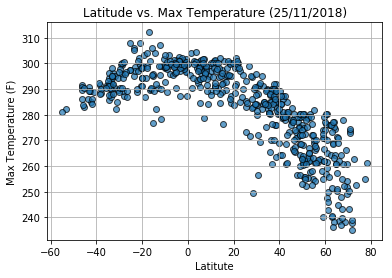

In [17]:
# Latitude vs. Temperature Plot
plt.scatter(
    x=city_record_df['lat'], 
    y=city_record_df['max_temp'],
    alpha=0.7,
    edgecolor='black'
)
plt.grid()
plt.title('Latitude vs. Max Temperature (25/11/2018)')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (F)')

# save png
plt.savefig('output_data/lat_max_temp.png')

plt.show()

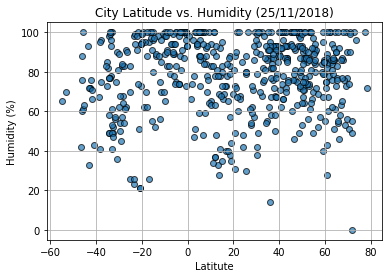

In [18]:
# Latitude vs. Humidity Plot
plt.scatter(
    x=city_record_df['lat'], 
    y=city_record_df['humidity'],
    alpha=0.7,
    edgecolor='black'
)
plt.grid()
plt.title('City Latitude vs. Humidity (25/11/2018)')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')

# save png
plt.savefig('output_data/lat_humidity.png')

plt.show()

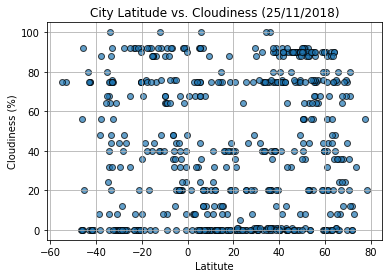

In [19]:
#Latitude vs. Cloudiness Plot
plt.scatter(
    x=city_record_df['lat'], 
    y=city_record_df['cloudiness'],
    alpha=0.7,
    edgecolor='black'
)
plt.grid()
plt.title('City Latitude vs. Cloudiness (25/11/2018)')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')

# save png
plt.savefig('output_data/lat_cloudiness.png')

plt.show()

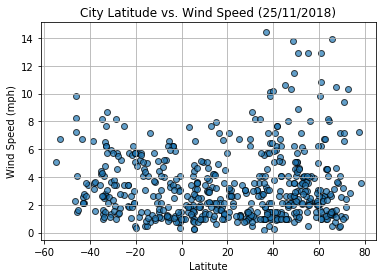

In [20]:
# Latitude vs. Wind Speed Plot
plt.scatter(
    x=city_record_df['lat'], 
    y=city_record_df['wind_speed'],
    alpha=0.7,
    edgecolor='black'
)
plt.grid()
plt.title('City Latitude vs. Wind Speed (25/11/2018)')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')

# save png
plt.savefig('output_data/lat_wind_speed.png')

plt.show()